# IMPORT

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from pathlib import Path
import os
import pandas as pd
import seaborn as sns


# READFILE

In [2]:
PATH  = Path.cwd() / 'Data/Titanic-Dataset.csv'
DATA = pd.read_csv(PATH)
DATA

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
DATA.describe() #general for statistical values


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Variable Description**<br>
1. PassengerID: unique id number to each passenger<br>
2. Survived: passenger survive(1) or died(0)<br>
3. Pclass: passenger class<br>
4. Name: name<br>
5. Sex: gender of passenger<br>
6. Age: age of passenger<br>
7. SibSp: siblings - spouses, number of sibling or spouses<br>
8. Parch: number of Parent - number of Children<br>
9. Ticket: ticket number<br>
10. Fare: amount of money for ticket<br>
11. Cabin: cabin Category<br>
12. Embarked: which port S=Southampton C=Cherbourg Q=Queenstown<br>


# ANYLIST FEATURES

In [4]:
print(DATA.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


**Categorial Features**<br>
Categorial :  Survived, Sex, and Embarked.<br>
Ordinal: Pclass.<br><br>
**Numeric Features**<br>
Continous: Age, Fare<br>
Discrete: SibSp, Parch<br><br>
**There are some Mixed Features which each of them is a combination of numerical and alphanumeric features**<br>
Ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric.<br><br>

The question is is there any error features?

# DATA PREPROCESSING 

In [5]:
print("Missing Values per Column:")
print(DATA.isnull().sum())
print("------------------------------------")
print("Infinity Values per Column:")
print((DATA == np.inf).sum() + (DATA == -np.inf).sum())

Missing Values per Column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
------------------------------------
Infinity Values per Column:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


The answers is **YES**, There are some Passenger don't have Age or Cabin on this Titanic Ship. We will erase those all rows and collumns that is contains an error value.

In [6]:
#DATA.drop('Cabin', axis=1, inplace=True)
df_clean = DATA.dropna()
df_clean

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


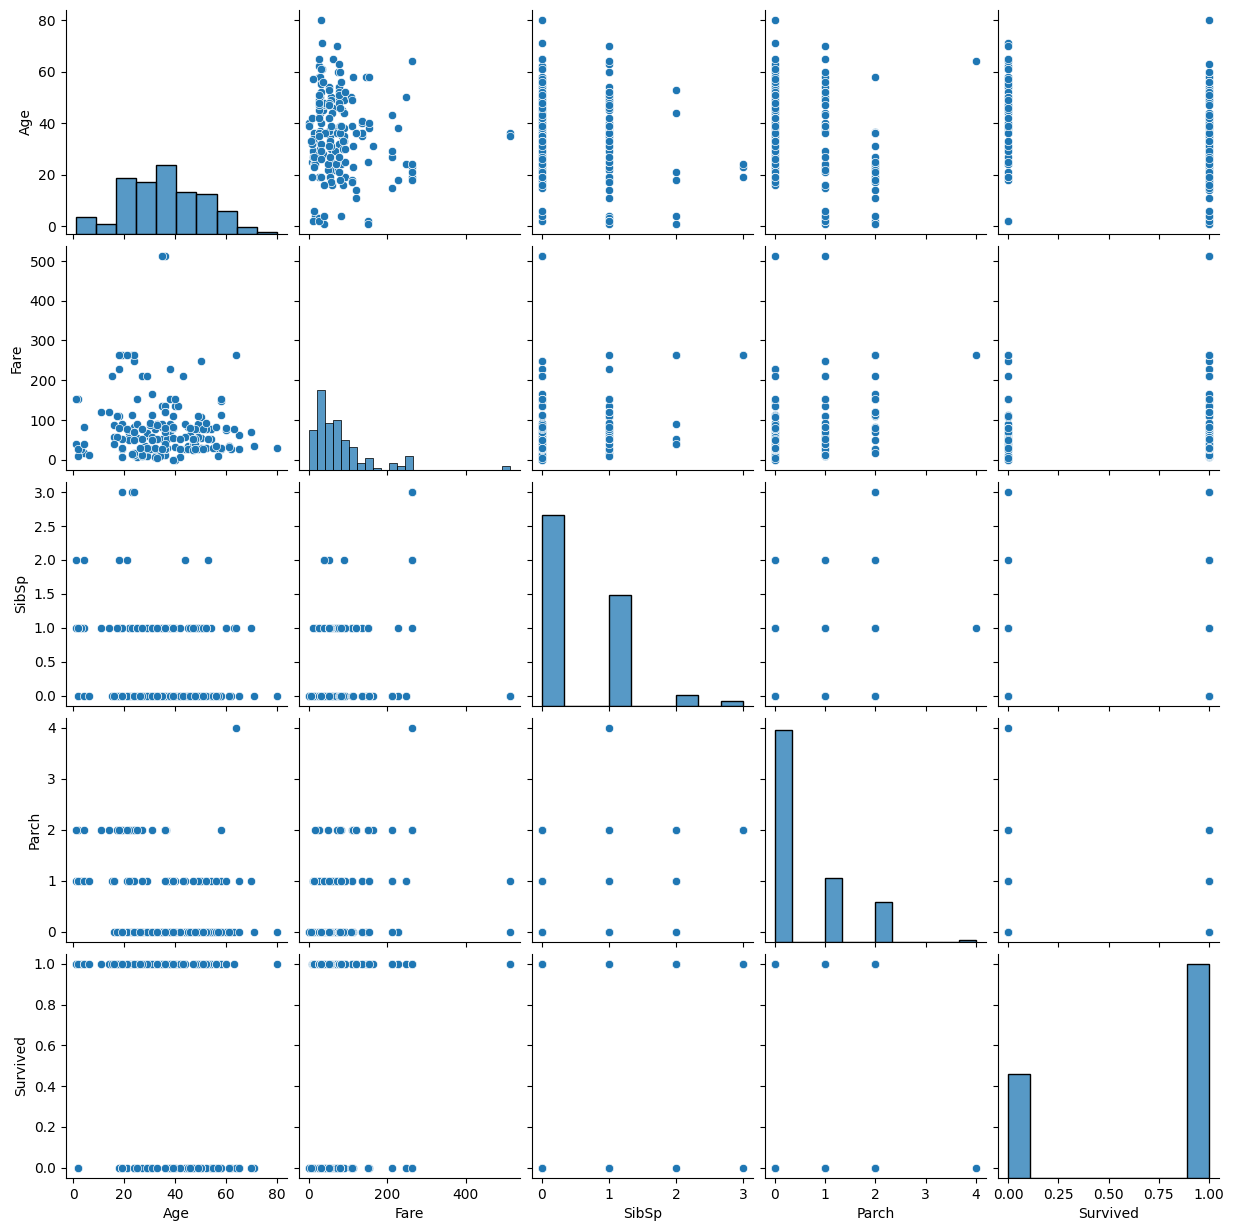

In [7]:
sns.pairplot(data = df_clean,vars=["Age", "Fare", "SibSp","Parch","Survived"])
plt.show()

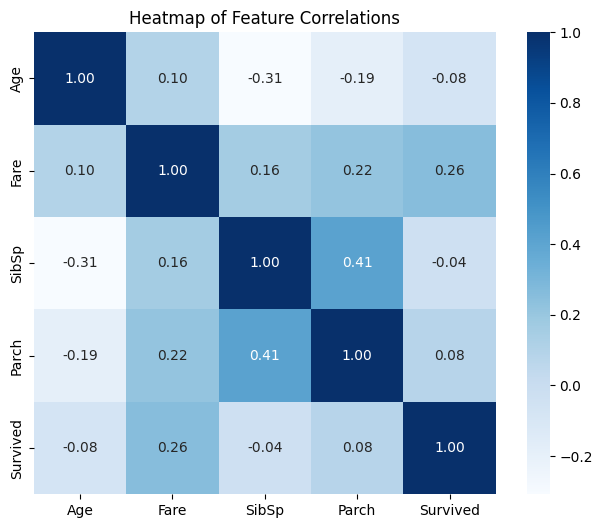

In [8]:
selected_columns = ['Age', 'Fare', 'SibSp', 'Parch', 'Survived']
corr = DATA[selected_columns].corr()

# Vẽ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f", square=True)
plt.title('Heatmap of Feature Correlations')
plt.show()

# ANYLIST CATEGORICAL DATA

In [9]:
import matplotlib.pyplot as plt
def histogram(variable):
    """
    input: variable ex:"Age"
    output: histogram & value count
    """
    # get feature
    var = DATA[variable]

    # count number of continuous variable
    varValue = var.value_counts()

    # visualize
    plt.figure(figsize=(8,3))
    plt.hist(var, bins=20, color='blue', alpha=0.7)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()

    print("{}: \n{}".format(variable, varValue))

def bar_plot(variable):
    """
    input: variable ex:"Sex"
    output: bar plot & value count
    """
    # get feature
    var = DATA[variable]

    # count number of categorical variable
    varValue = var.value_counts()

    # visualize
    plt.figure(figsize=(8,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()

    print("{}: \n{}".format(variable, varValue))

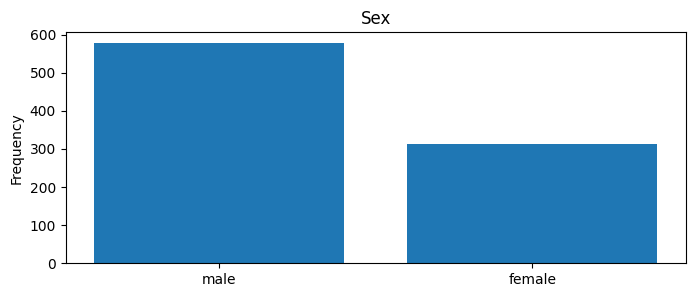

Sex: 
Sex
male      577
female    314
Name: count, dtype: int64


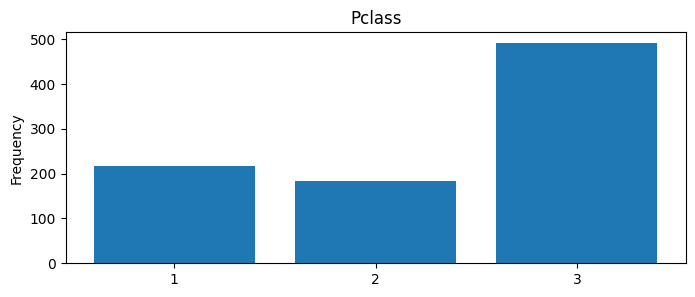

Pclass: 
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


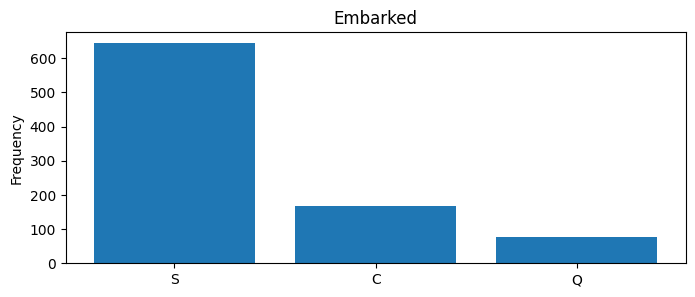

Embarked: 
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


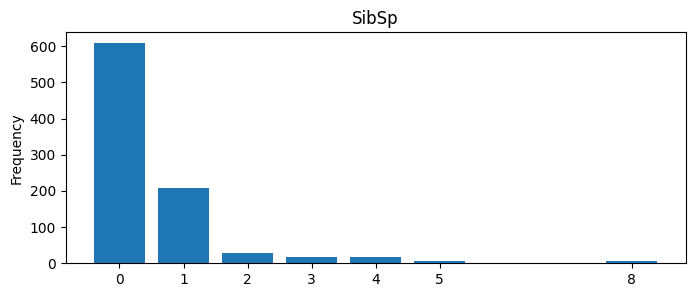

SibSp: 
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


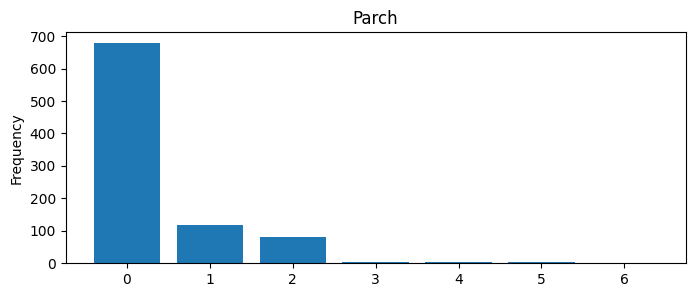

Parch: 
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


In [10]:
category1=["Sex","Pclass","Embarked","SibSp","Parch"]
for c in category1:
    bar_plot(c)

# ANYLIST NUMERICAL DATA

In [11]:
def plot_hist(variable):
    plt.figure(figsize=(8,3))
    plt.hist(DATA[variable],bins=50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} Distribituon with hist".format(variable))
    plt.show()

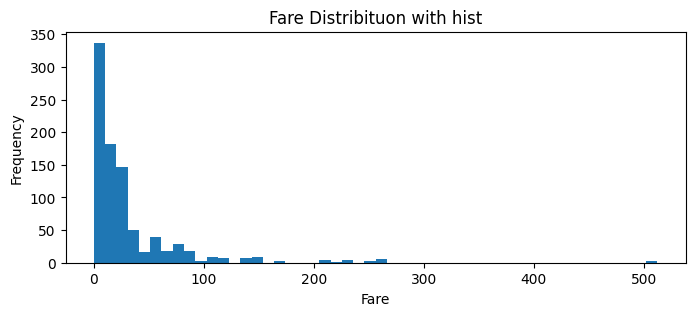

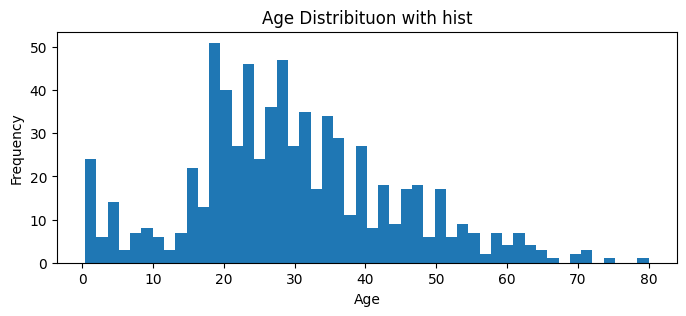

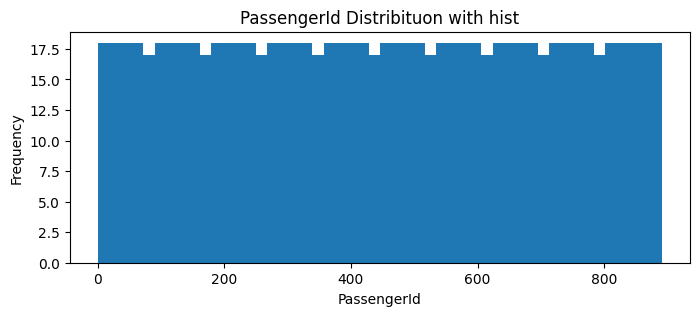

In [12]:
numericVar=["Fare","Age","PassengerId"]
for n in numericVar:
    plot_hist(n)

# BASIC DATA ANYLIST

In this section I will use some Categorial Features to anylist and create a simple rating table for those features

In [13]:
DATA[["Pclass","Survived"]]


,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0
...,...,...
886,2,0
887,1,1
888,3,0
889,1,1


In [14]:
DATA[["Pclass","Survived"]].groupby(["Pclass"],as_index = False).mean()


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [15]:
DATA[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [16]:
DATA[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [17]:
DATA[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


1. Pclass We observe significant correlation (>0.5) among Pclass=1 and Survived (classifying #3). We decide to include this feature in our model.
2. Sex We confirm the observation during problem definition that Sex=female had very high survival rate at 74% (classifying #1).
3. SibSp and Parch These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features (creating #1).

# References

https://www.kaggle.com/code/startupsci/titanic-data-science-solutions#Analyze-by-pivoting-features

https://www.kaggle.com/code/kaganaslan/titanic-eda-data-analysis#Fill-Missing-Value

https://machinelearningcoban.com/tabml_book/ch_data_processing/eda.html

Source Dataset<br>
https://www.kaggle.com/datasets/yasserh/titanic-dataset